In [5]:
import numpy as np
from matplotlib import pyplot as plt


[1.3676018e-01 2.7764048e-02 1.6662547e-01 1.4367479e+00 2.9279703e+02]


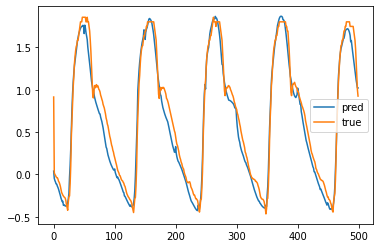

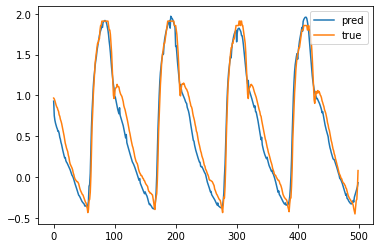

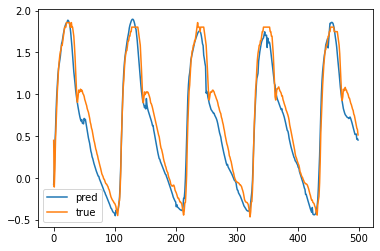

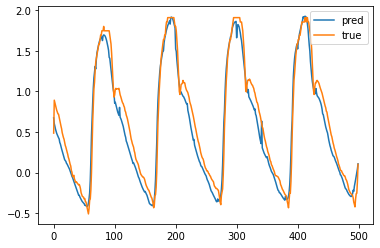

In [6]:
mertrics = np.load('metrics.npy')
print(mertrics)
# mse:0.019240623340010643, mae:0.09517072141170502
pred = np.load('pred.npy')
true = np.load('true.npy')
true.shape

k = 0
for i, j in zip(pred, true):
    k=k+1
    if k % 500 == 0:
        plt.plot(i)
        plt.plot(j)
        plt.legend(['pred','true'])
        plt.show()

[9.0958154e-01 1.2791500e+00 1.1309952e+00 5.9697385e+00 4.3129429e+03]


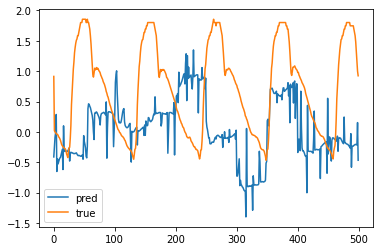

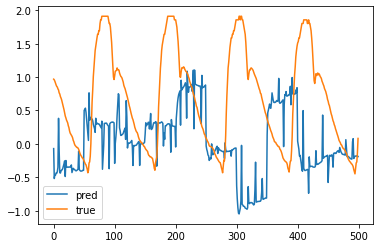

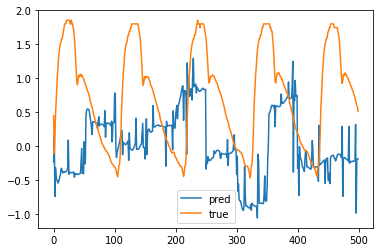

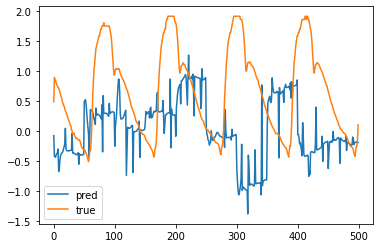

In [7]:
mertrics = np.load('best_metrics.npy')
print(mertrics)
pred = np.load('best_pred.npy')
true = np.load('best_true.npy')
true.shape

k = 0
for i, j in zip(pred, true):
    k=k+1
    if k % 500 == 0:
        plt.plot(i)
        plt.plot(j)
        plt.legend(['pred','true'])
        plt.show()